In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the customer_value_analysis.csv into the variable customer_df.
customer_df =pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
#First look at its main features (head, shape, info)
customer_df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape


(9134, 24)

In [5]:

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
cols = []
for col in customer_df.columns:
        cols.append(col.lower().replace(' ', '_'))
customer_df.columns = cols


In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# Change effective to date column to datetime format.
from datetime import datetime
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])
 
# Check the format of 'Date' column
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [9]:
# Check NaN values per column
customer_df.isnull().values.any()

False

In [10]:
# Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and 
def split(x):
    
    categorical = x.select_dtypes("object")
    numerical= x.select_dtypes("integer", "float")
    
    categorical = pd.DataFrame(categorical)
    numerical = pd.DataFrame(numerical)
    return categorical, numerical
    
   



In [22]:
categorical, numerical = split(customer_df)
categorical.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
#Get the correlation matrix for the numerical variables. 
#What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [23]:
c_mat=numerical.corr().abs()
s = c_mat.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

print (so)
# months_since_policy_inception and  months_since_last_claim 

income                         income                           1.000000
monthly_premium_auto           monthly_premium_auto             1.000000
number_of_open_complaints      number_of_open_complaints        1.000000
months_since_policy_inception  months_since_policy_inception    1.000000
months_since_last_claim        months_since_last_claim          1.000000
number_of_policies             number_of_policies               1.000000
months_since_policy_inception  months_since_last_claim          0.042959
months_since_last_claim        months_since_policy_inception    0.042959
income                         months_since_last_claim          0.026715
months_since_last_claim        income                           0.026715
monthly_premium_auto           months_since_policy_inception    0.020257
months_since_policy_inception  monthly_premium_auto             0.020257
income                         monthly_premium_auto             0.016665
monthly_premium_auto           income              

In [ ]:
# Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames:
#the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 
#To this end, it might be helpful to count the number of unique values. The function must have an optional argument
# set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: 
#continuous_df and discrete_df.

In [24]:
numerical['number_of_open_complaints'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [25]:


def split_numerics(df, num_unique=36):
    df_discrete=[]
    df_continuous=[]
    for col in df:
        if len(df[col].unique())>=num_unique:
            df_continuous.append(df[col])
        else:
            df_discrete.append(df[col])
    df_continuous = pd.DataFrame(df_continuous).T
    df_discrete = pd.DataFrame(df_discrete).T 
    
    return df_discrete, df_continuous

            

  

In [26]:
df_discrete, df_continuous = split_numerics(numerical)

In [27]:
display(df_discrete)
display(df_continuous)

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,56274,69,32,5
1,0,94,13,42
2,48767,108,18,38
3,0,106,18,65
4,43836,73,12,44
...,...,...,...,...
9129,71941,73,18,89
9130,21604,79,14,28
9131,0,85,9,37
9132,21941,96,34,3


In [ ]:
# Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_bar(df_discrete):
    plt_size = len(df_discrete.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in df_discrete.columns:
        sns.barplot(data=df_discrete, x=df_discrete[i], y=df_discrete[i].value_counts(), ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()
    

    


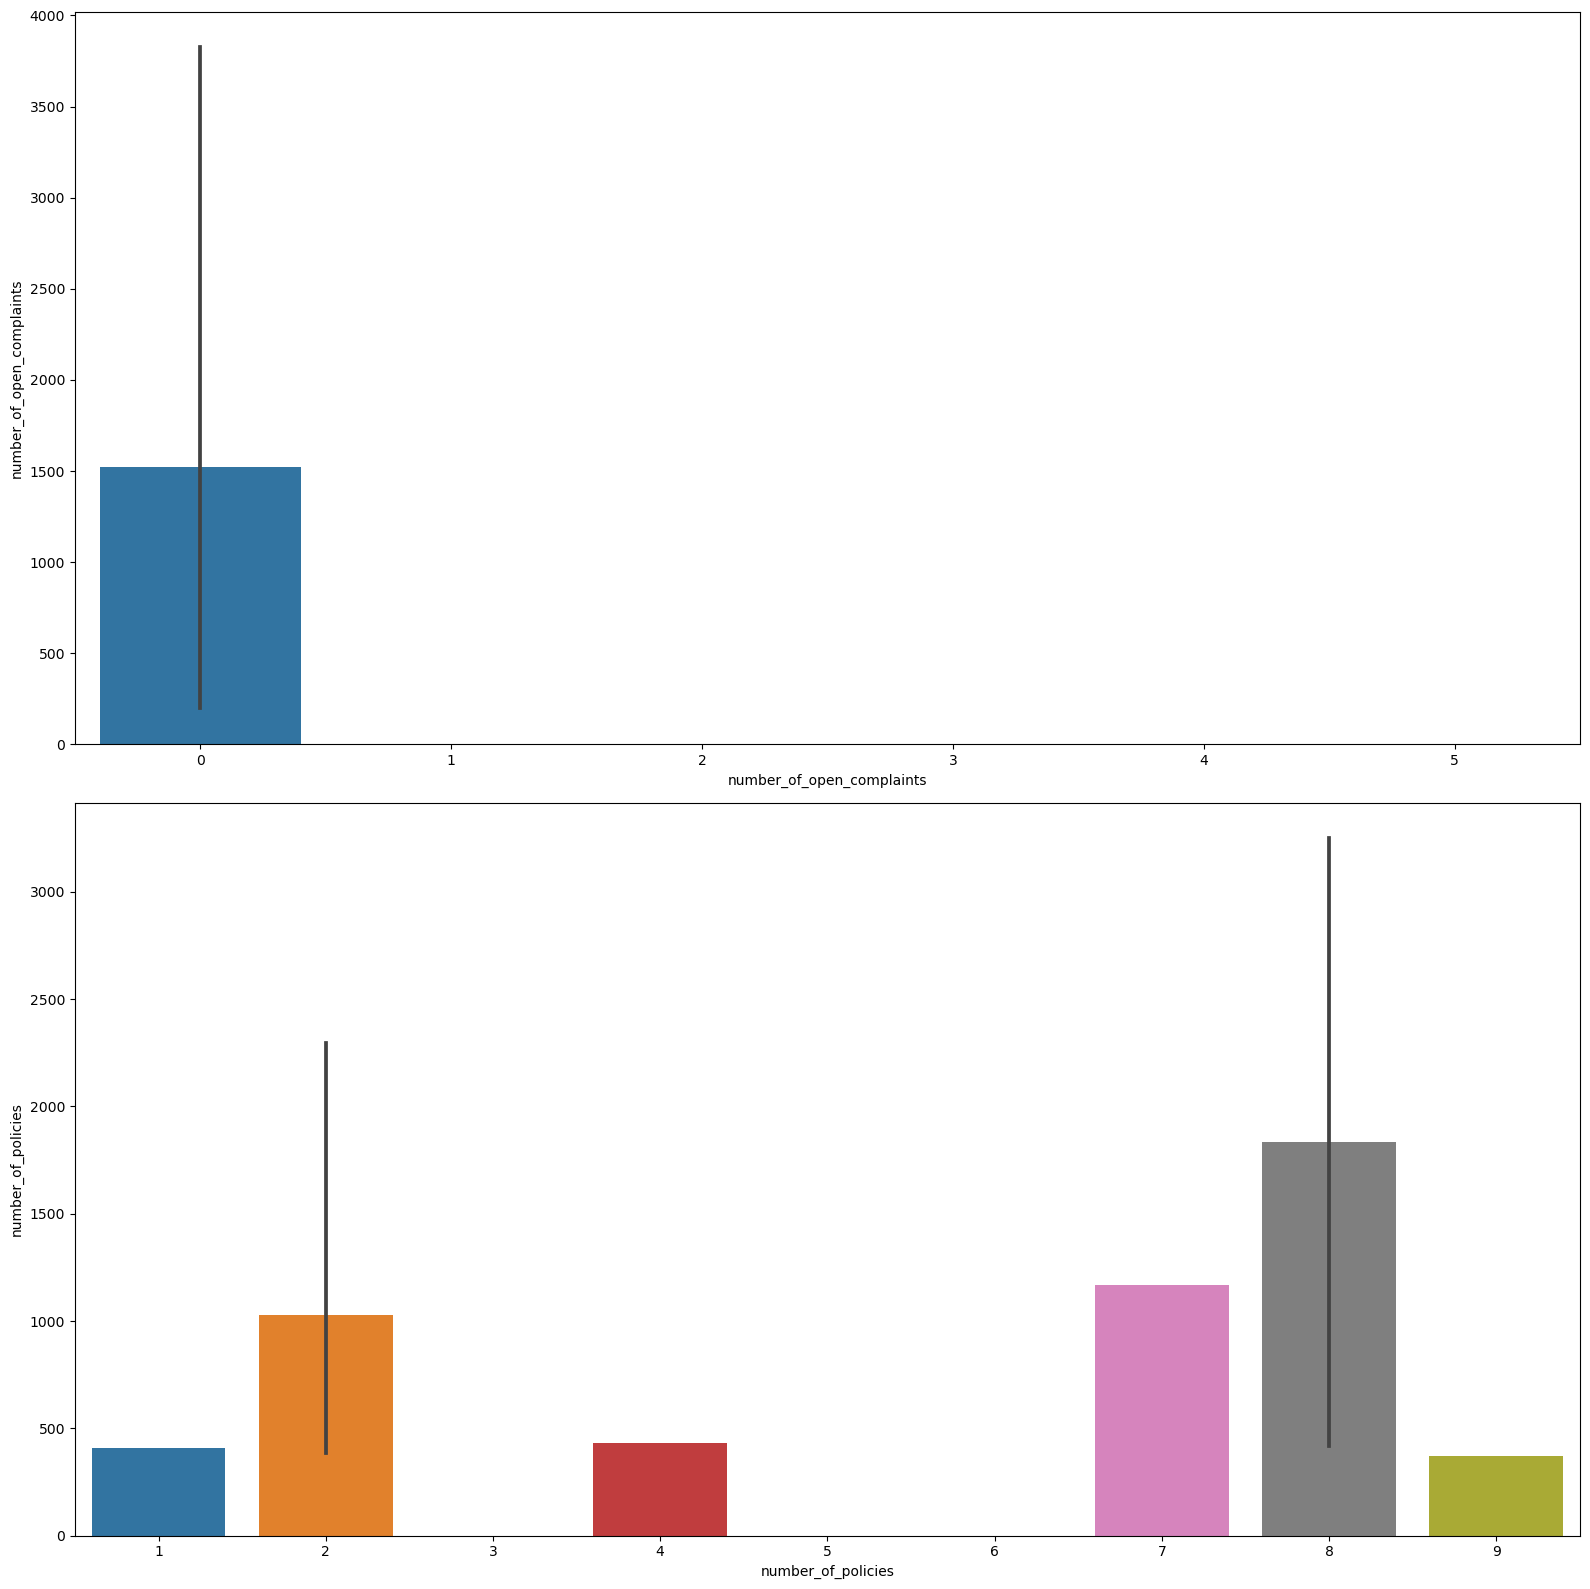

In [29]:
plot_bar(df_discrete)

In [30]:
# Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
def plot_hist(df_continuous):
    plt_size = len(df_continuous.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in df_continuous.columns:
        sns.histplot(data=df_continuous, x=df_continuous[i], ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()

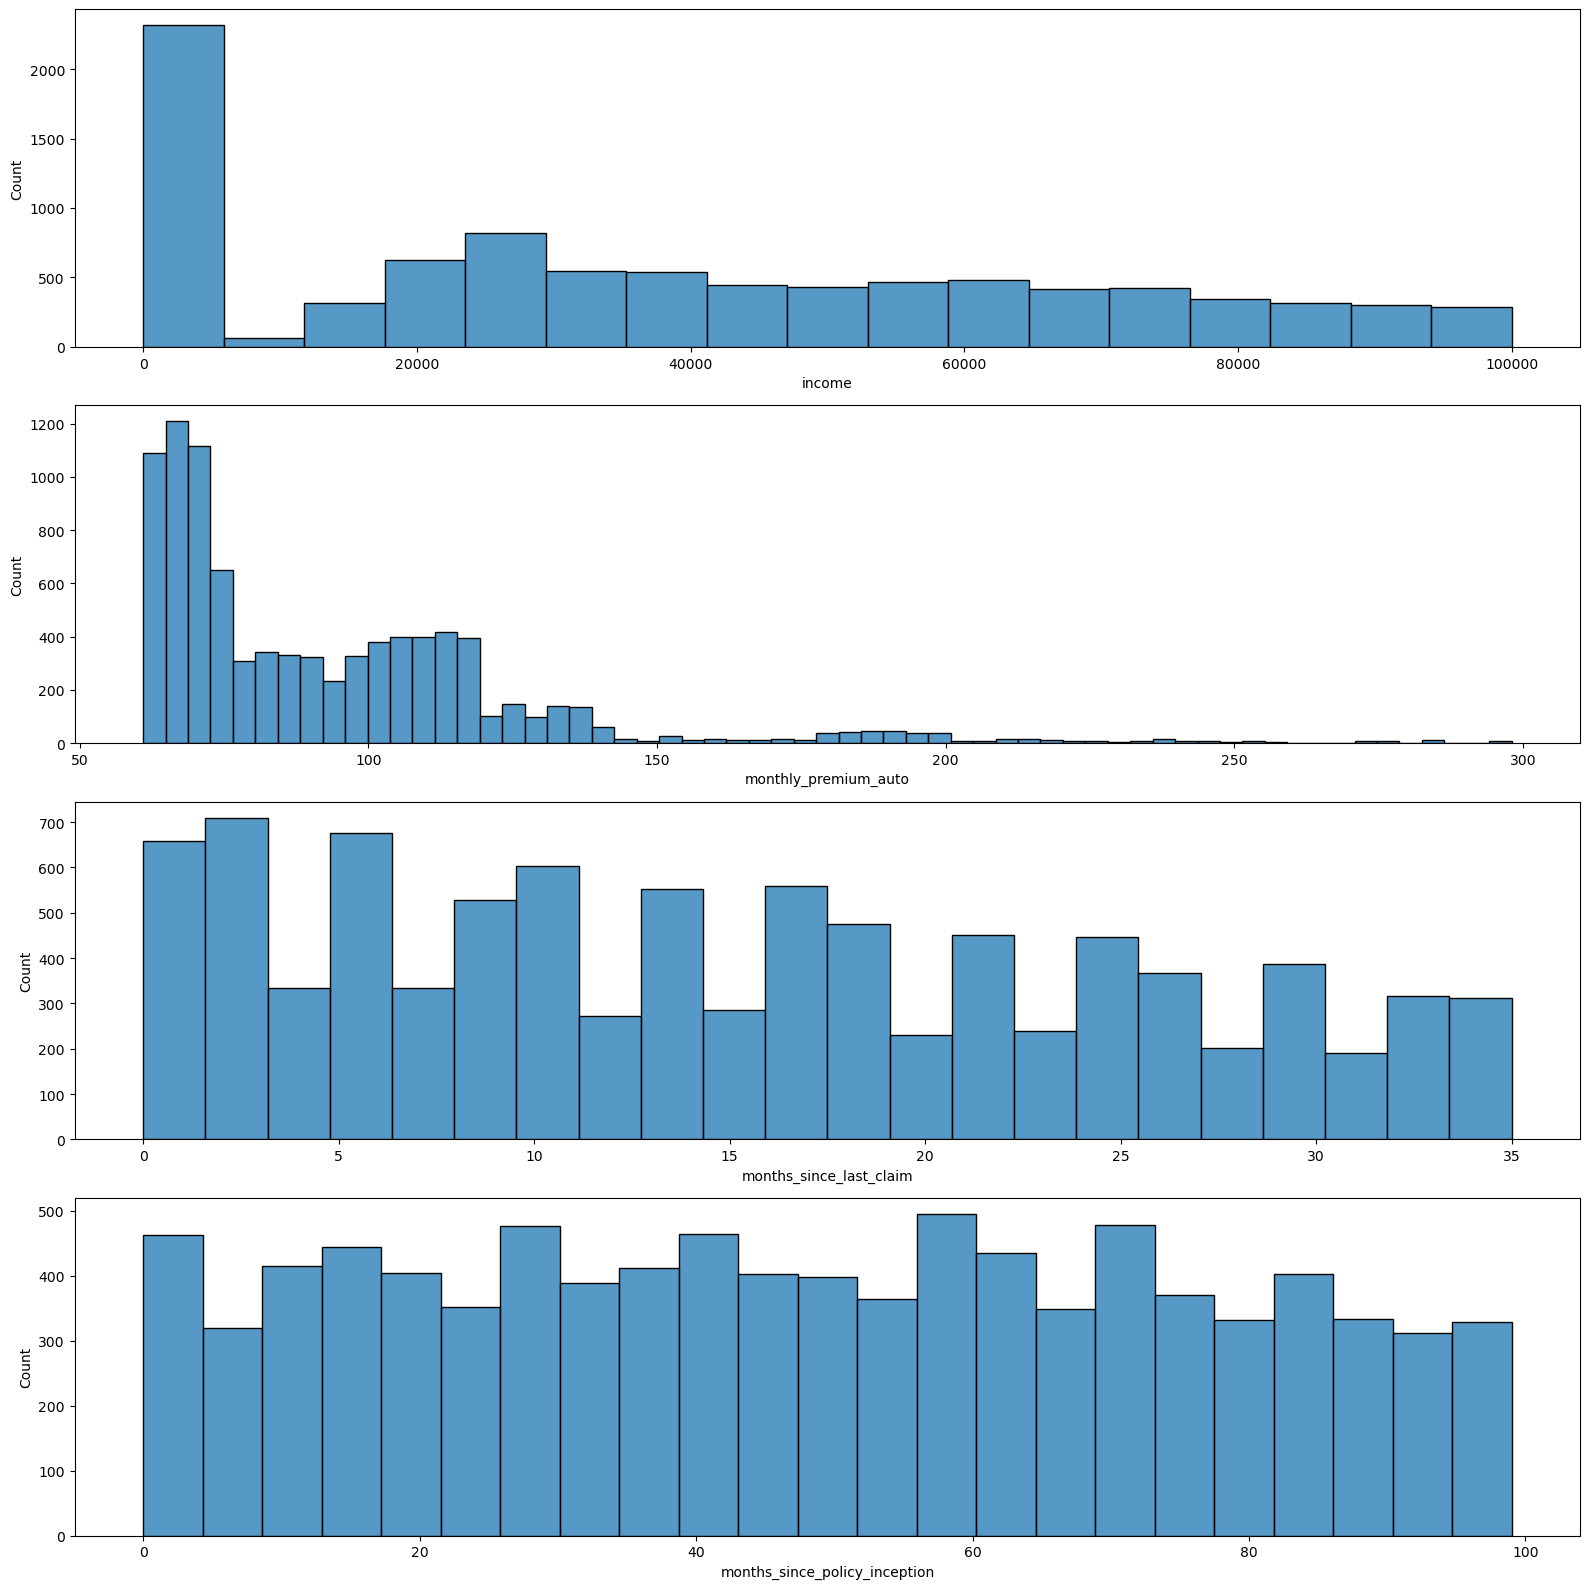

In [31]:
plot_hist(df_continuous)

In [ ]:
#According to the previous histogram plots, do you think that you do will have to apply any transformation?

In [ ]:
#Yes,it looks skewed to the right, thus needing a transformation. 


In [ ]:
# Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that.
#Define a function to create this kind of plots for the continuous_df.

In [32]:
def plot_box(df_continuous):
    plt_size = len(df_continuous.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in df_continuous.columns:
        sns.boxplot(data=df_continuous, x=df_continuous[i], ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()

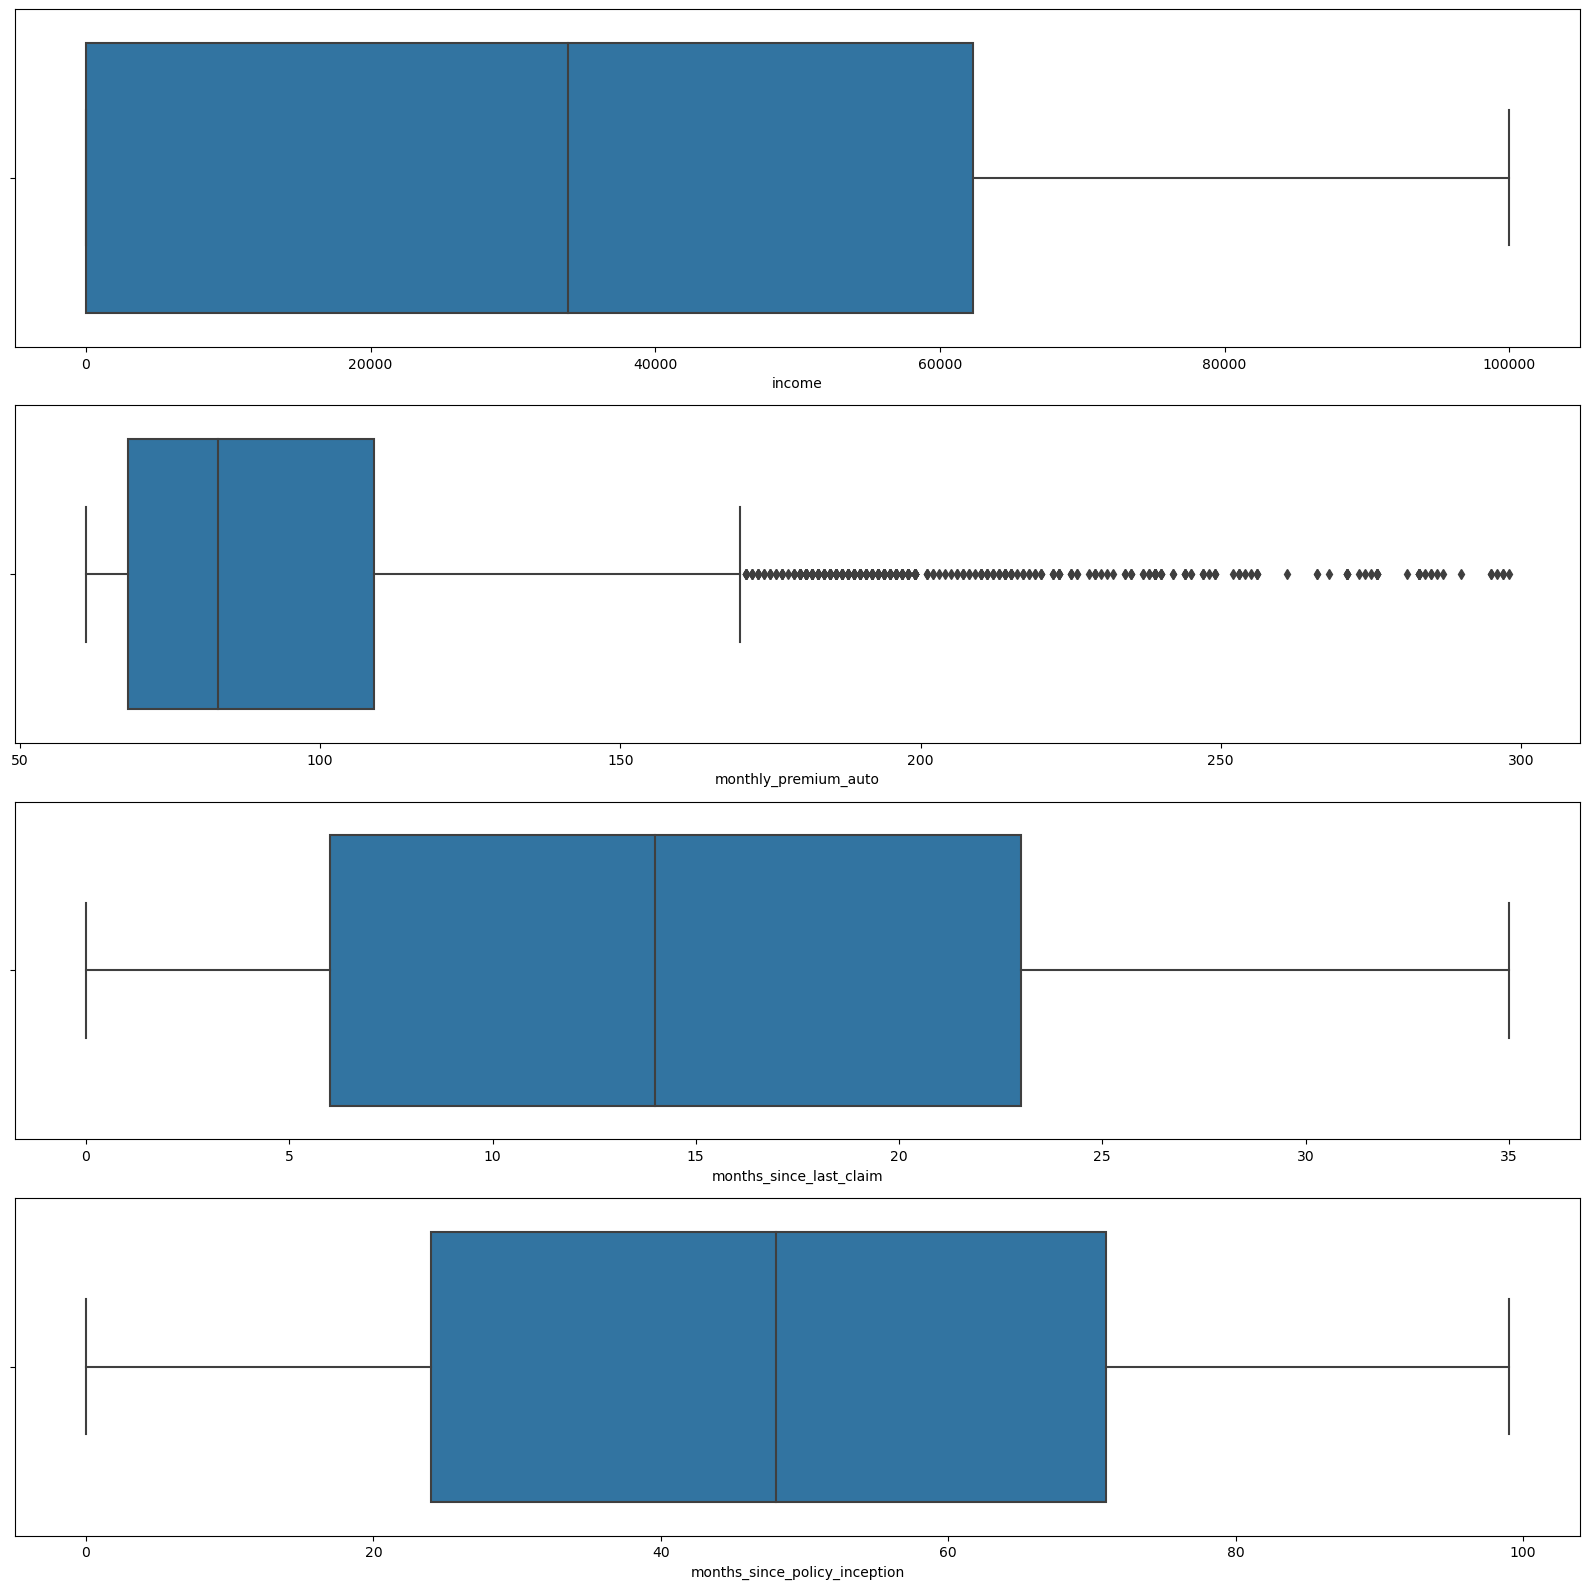

In [33]:
plot_box(df_continuous)

# Lab Cleaning Categorical Data

Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed in the y axis instead of the x one.

In [34]:
def plot_count(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(10,60))
    n = 0
    for i in df.columns:
        if len(df[i].unique())>=6:
            sns.countplot(data=df, y=df[i], hue=i, ax = ax[n])
            n+=1
        else:
            sns.countplot(data=df, x=df[i],hue=i, ax = ax[n])
            n += 1
            
        
       
    
    plt.tight_layout()    
    plt.show()
    
    

KeyboardInterrupt: 

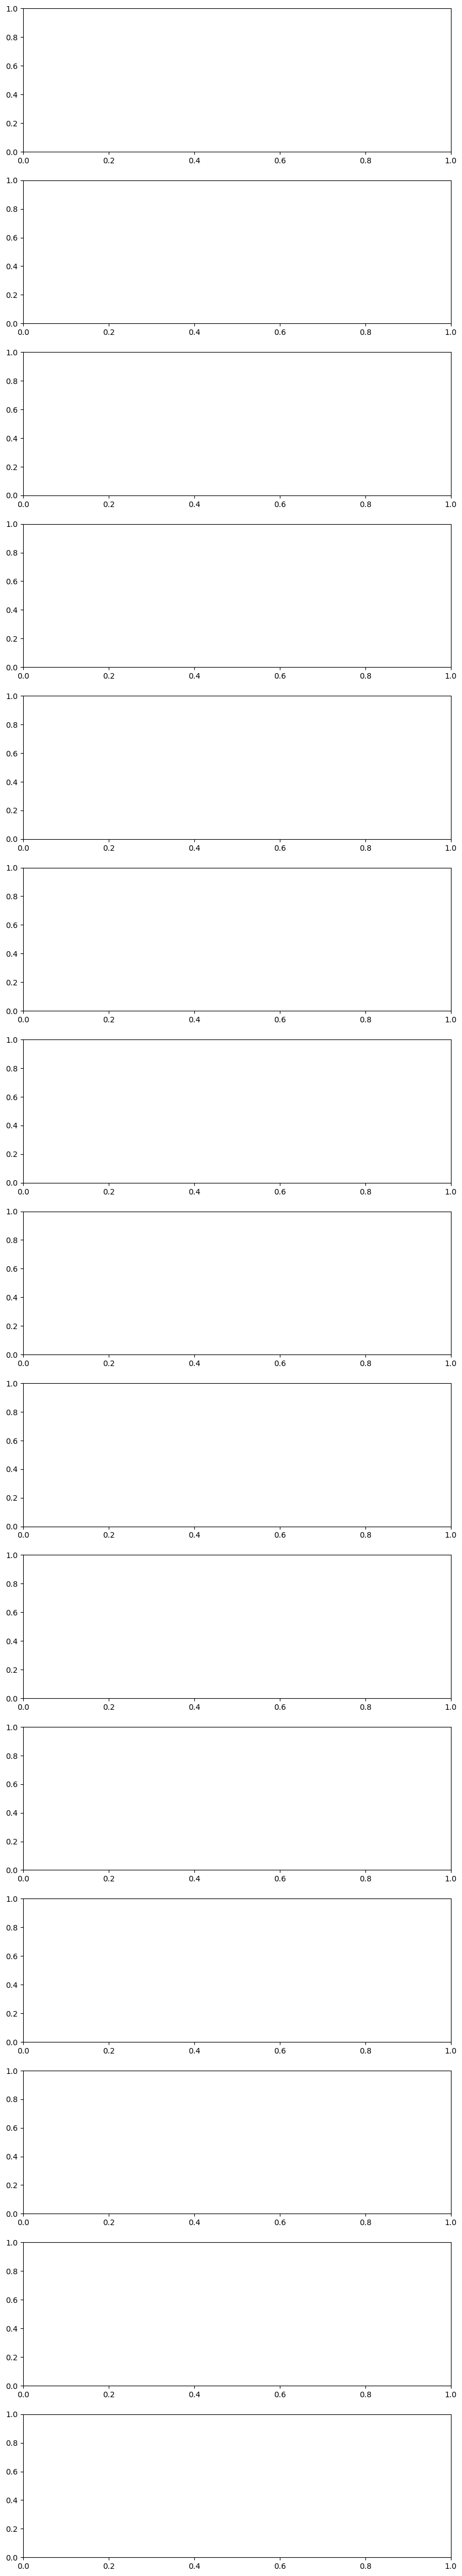

In [127]:
plot_count(categorical)

policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with a OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [76]:
#customer_df=customer_df.drop(columns="policy_type")
import regex as re
def clean_pol(x):
    
    x=re.sub('.*\sL3', 'L3', x)
    
    x=re.sub('.*\sL2', 'L2', x)
    x=re.sub('.*\sL1', 'L1', x)
    return x
    
   
        
   

  

In [77]:
customer_df["policy"]=customer_df["policy"].apply(clean_pol)

In [78]:
customer_df["policy"].unique()

array(['L3', 'L2', 'L1'], dtype=object)

Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)
                

In [36]:
customer_df["effective_to_date"]=pd.to_datetime(customer_df["effective_to_date"])

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

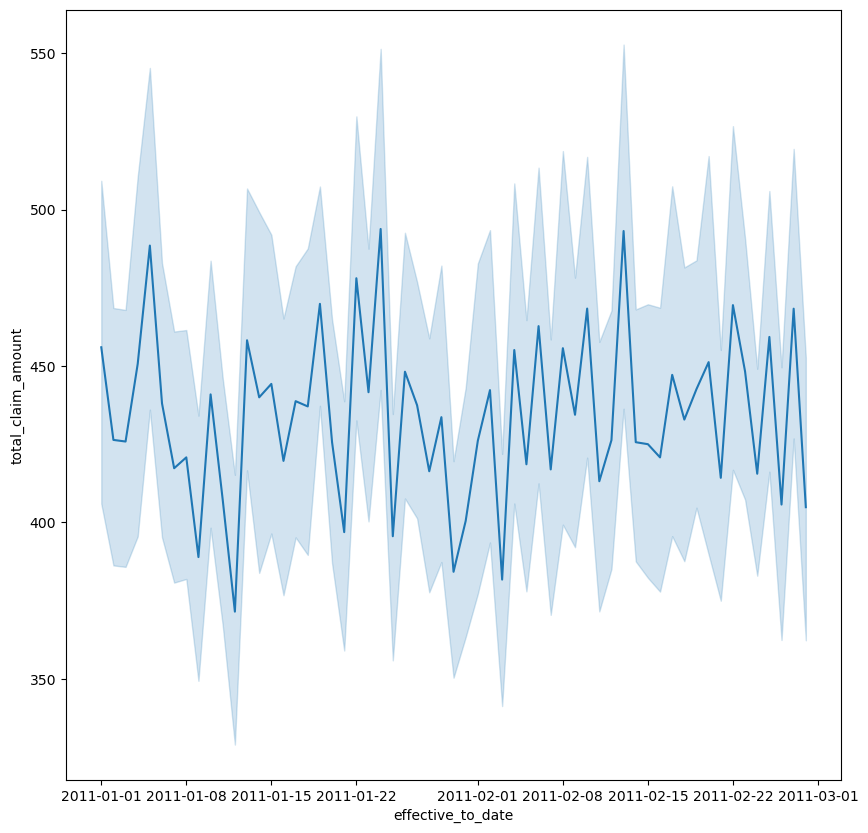

In [37]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.lineplot(data=customer_df, y="total_claim_amount", x="effective_to_date")

To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [38]:
import datetime
df = pd.DataFrame()
df['day']= pd.DatetimeIndex(customer_df['effective_to_date']).day
df['day_name']= pd.DatetimeIndex(customer_df['effective_to_date']).day_name()
df['week_name']= pd.DatetimeIndex(customer_df['effective_to_date']).week
df['month_name']= pd.DatetimeIndex(customer_df['effective_to_date']).month_name()
df['total_claim_amount']= customer_df['total_claim_amount']
df


C:\Users\hugoa\AppData\Local\Temp\ipykernel_9832\3253892661.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_name']= pd.DatetimeIndex(customer_df['effective_to_date']).week


,day,day_name,week_name,month_name,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [39]:
df[["day", "total_claim_amount"]].reindex(index=df["day"]).sort_index().round(2)

,day,total_claim_amount
day,,
1,31,1131.46
1,31,1131.46
1,31,1131.46
1,31,1131.46
1,31,1131.46
...,...,...
31,22,615.93
31,22,615.93
31,22,615.93


Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week?

<AxesSubplot:xlabel='day', ylabel='total_claim_amount'>

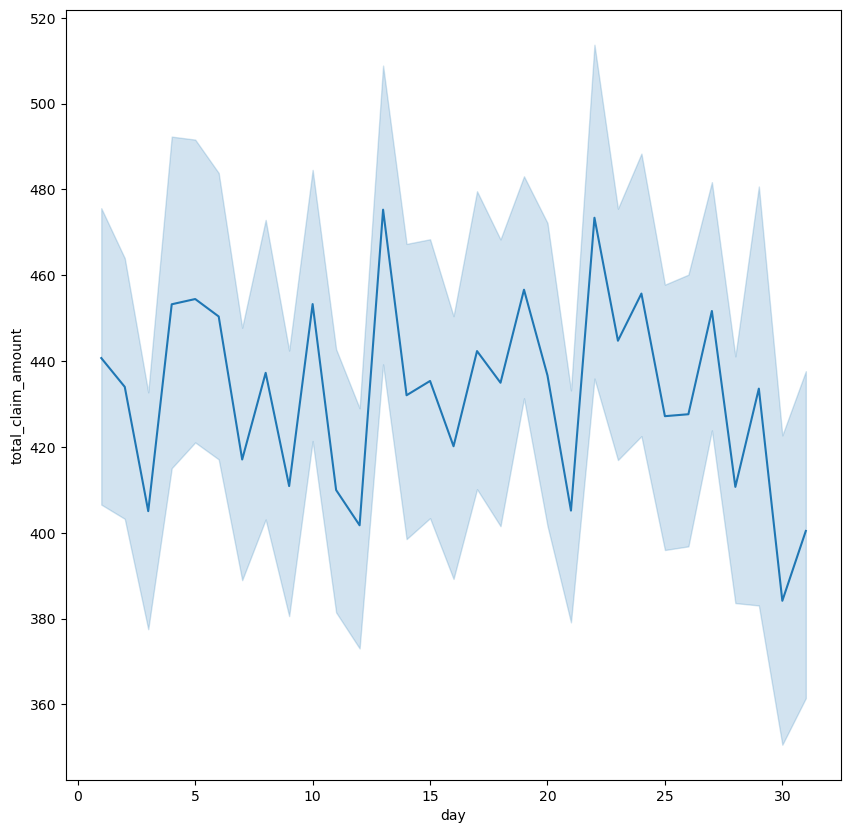

In [40]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.lineplot(data=df, y="total_claim_amount", x="day")

In [ ]:
#Days 13 and 22 have a higher claim amount

Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [41]:
df[["day_name", "total_claim_amount"]].reindex(index=df["day"]).sort_index().round(2)

,day_name,total_claim_amount
day,,
1,Monday,1131.46
1,Monday,1131.46
1,Monday,1131.46
1,Monday,1131.46
1,Monday,1131.46
...,...,...
31,Saturday,615.93
31,Saturday,615.93
31,Saturday,615.93


Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [42]:
median=df.groupby(df.day_name)[['total_claim_amount']].median().sort_values(by="total_claim_amount", ascending=False)
median

,total_claim_amount
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

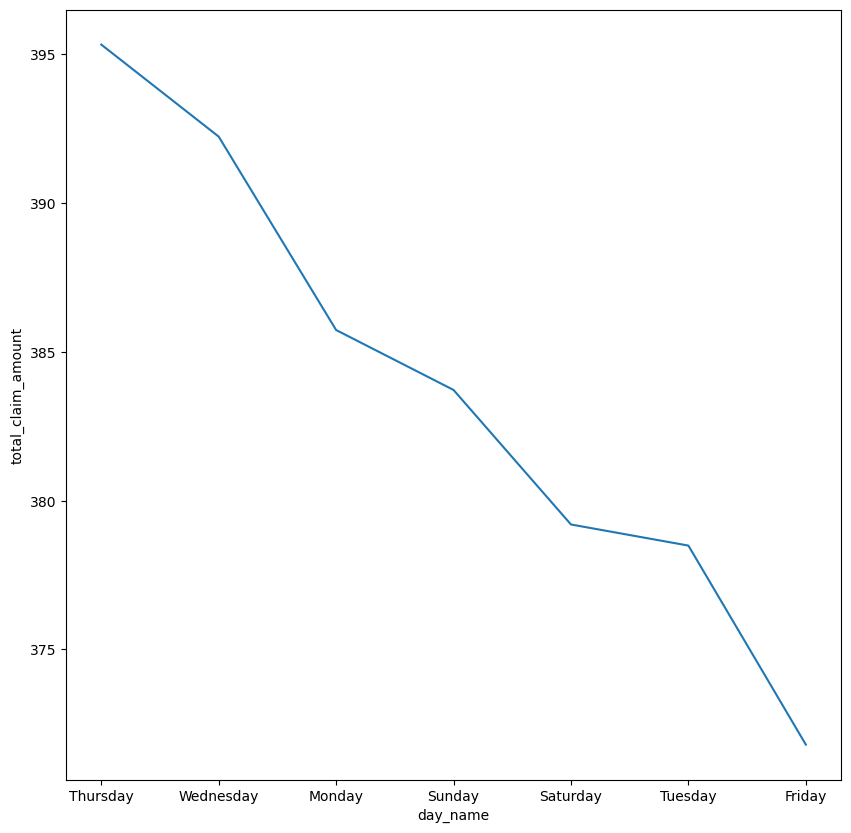

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.lineplot(data=median, y="total_claim_amount", x="day_name")

What do you can conclude from this analysis?

In [ ]:
#Fridays are the worst day in terms of the target variable "total_claim_amount", 
#while Thursdays are the days with the highest "total_claim_amount"

Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [44]:
df[["month_name", "total_claim_amount"]].reindex(index=df["day"]).sort_index().round(2)

,month_name,total_claim_amount
day,,
1,January,1131.46
1,January,1131.46
1,January,1131.46
1,January,1131.46
1,January,1131.46
...,...,...
31,January,615.93
31,January,615.93
31,January,615.93


Can you do a monthly analysis given the output of the previous series? Why?

<AxesSubplot:xlabel='month_name', ylabel='total_claim_amount'>

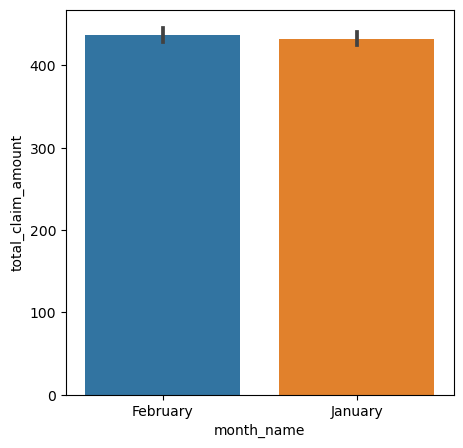

In [45]:
fig, ax = plt.subplots(1, figsize=(5,5))
sns.barplot(data=df, y="total_claim_amount", x="month_name")

In [ ]:
# Seems like there are no significative differences for total_claim_amount while filtering by month.

In [118]:
df.head()

,day,day_name,week_name,month_name,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).


In [120]:
import statistics as stats

df=df.drop(["day_name", "month_name"], axis=1)
def remove_outliers(df, thr=3):
    
    df = df.copy()
    to_remove = []
    
    for col in df.columns:
        mean = df[col].mean()
        limit = thr * df[col].std()
        
        out = df[(df[col] < mean-limit)|(df[col] > mean+limit)]
        to_remove += list(out.index)
        
    df = df.drop(to_remove)
    return df
                
                         
                  
                       
                        
    
                     
    

Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [126]:
without_outliers_df = remove_outliers(df)
without_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8674 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 8674 non-null   int64  
 1   week_name           8674 non-null   int64  
 2   total_claim_amount  8674 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 271.1 KB


Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df. As after removing outliers the continuous_cleaned dataframe will have less rows (when you concat the individual dataframes using using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [130]:
final=pd.concat([without_outliers_df, df_discrete, categorical], axis=1).dropna().reset_index()
final.columns


Index(['index', 'day', 'week_name', 'total_claim_amount',
       'number_of_open_complaints', 'number_of_policies', 'customer', 'state',
       'response', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [134]:
final = final[['index', 'day', 'week_name',
       'number_of_open_complaints', 'number_of_policies', 'customer', 'state',
       'response', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'total_claim_amount']]

In [135]:
final.head()

,index,day,week_name,number_of_open_complaints,number_of_policies,customer,state,response,coverage,education,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,0,24.0,8.0,0,1,BU79786,Washington,No,Basic,Bachelor,...,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,1,31.0,5.0,0,8,QZ44356,Arizona,No,Extended,Bachelor,...,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,2,19.0,7.0,0,2,AI49188,Nevada,No,Premium,Bachelor,...,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,3,20.0,3.0,0,7,WW63253,California,No,Basic,Bachelor,...,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,4,3.0,5.0,0,1,HB64268,Washington,No,Basic,Bachelor,...,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


Turn the response column values into (Yes=1/No=0).

In [140]:
final["response"]=final["response"].replace({"Yes":1, "No":0})
final["response"].unique()

array([0, 1], dtype=int64)

Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [142]:
final["education"]=final["education"].replace({"Master":"Graduate", "Doctor":"Graduate"})
final["education"].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [143]:
final["employmentstatus"]=final["employmentstatus"].replace({"Medical Leave":"Inactive", "Disabled":"Inactive","Retired":"Inactive" })
final["employmentstatus"].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

Deal with column Gender turning the values into (1/0).

In [146]:
final["gender"]=final["gender"].replace({"F":1, "M":0})
final["gender"].unique()

array([1, 0], dtype=int64)

Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing level of detail.

In [147]:
final["vehicle_class"]=final["vehicle_class"].replace({"Sports Car":"Luxury", "Luxury SUV":"Luxury","Luxury Car":"Luxury" })
final["vehicle_class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic"

In [149]:
final["coverage"]=final["coverage"].replace({"Basic":1, "Extended":2,"Premium":3 })
final["coverage"].unique()

array([1, 2, 3], dtype=int64)

Encode employmentstatus: "Employed" > "Inactive" > "Unemployed

In [150]:
final["employmentstatus"]=final["employmentstatus"].replace({"Employed":3, "Inactive":2,"Unemployed":1 })
final["employmentstatus"].unique()

array([3, 1, 2], dtype=int64)

Encode location code: "Urban" > "Suburban" > "Rural"

In [151]:
final["location_code"]=final["location_code"].replace({"Urban":3, "Suburban":2,"Rural":1 })
final["location_code"].unique()

array([2, 1, 3], dtype=int64)

Encode vehicle size: "Large" > "Medsize" > "Small"

In [155]:
final["vehicle_size"]=final["vehicle_size"].replace({"Large":3, "Medsize":2,"Small":1 })
final["vehicle_size"].unique()

array([2, 1, 3], dtype=int64)

Get a dataframe with the categorical nominal columns

In [233]:
cat_nom=final[[ 'state',
       'response', 'gender',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel']]
cat_nom.head()

,state,response,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel
0,Washington,0,1,2,Married,Corporate Auto,Corporate L3,Offer1,Agent
1,Arizona,0,1,2,Single,Personal Auto,Personal L3,Offer3,Agent
2,Nevada,0,1,2,Married,Personal Auto,Personal L3,Offer1,Agent
3,California,0,0,2,Married,Corporate Auto,Corporate L2,Offer1,Call Center
4,Washington,0,0,1,Single,Personal Auto,Personal L1,Offer1,Agent


Create a list named levels which has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
```
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```

In [234]:
levels=[]
cat_nom.columns
  
for i  in cat_nom.columns:
        levels.append(list(cat_nom[i].unique()))
            

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], [1, 0], [2, 1, 3], ['Married', 'Single', 'Divorced'], ['Corporate Auto', 'Personal Auto', 'Special Auto'], ['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1', 'Special L2', 'Corporate L1', 'Personal L2', 'Special L1', 'Special L3'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch']]


Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [242]:
pd.get_dummies(cat_nom, drop_first=True)

,response,gender,location_code,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,1,2,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
2,0,1,2,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,0,0,3,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
8670,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8671,0,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8672,0,0,2,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
